In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import food_data
import os

In [2]:
MODEL_NAME = 'fine_tuned_v1'
MODEL_NAME_JSON = MODEL_NAME + '.json'

In [3]:
hist_df = pd.read_json('./histories/' + MODEL_NAME_JSON)

In [4]:
hist_df

,loss,accuracy,val_loss,val_accuracy
0,1.921739,0.515289,15.979985,0.006409
1,1.398646,0.630283,17.552193,0.006673
2,1.213101,0.674845,18.886469,0.007201
3,1.089462,0.704167,19.968567,0.007003
4,0.999012,0.725234,21.141098,0.006276
5,0.920303,0.743957,22.289892,0.006541
6,0.863622,0.756356,23.302038,0.006871
7,0.811399,0.771695,24.193439,0.007069
8,0.767943,0.782080,24.928156,0.006276
9,0.729733,0.791012,25.333591,0.007135


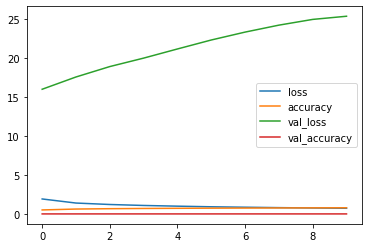

In [5]:
plt.plot(hist_df)
plt.legend(hist_df)

In [6]:
model = tf.keras.models.load_model('./models/' + MODEL_NAME)

In [7]:
from keras.utils.vis_utils import plot_model

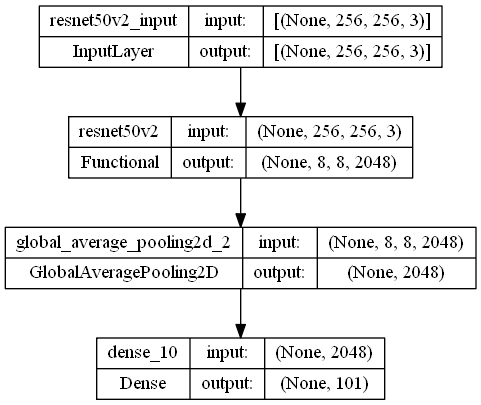

In [8]:
plot_model(model, to_file='./model_vis/' + MODEL_NAME + '.png', show_shapes=True, show_layer_names=True)

In [9]:
def get_id(name):
    names = name.split("/")
    return names[1]

In [10]:
def get_label(path):
    names = path.split("/")
    return names[0]

In [11]:
def exact_path(path):
    return "../food-101/images/" + path + ".jpg"

In [12]:
LABELS = os.listdir("../food-101/images")
test_names = []

with open("../food-101/meta/test.txt") as f:
    test_names = f.readlines()
    print(test_names.__len__())


test_df = pd.DataFrame(map(lambda x: x[:-1], test_names), columns=['path'])
test_df['label'] = test_df['path'].map(lambda x: get_label(x))
test_df['id'] = test_df['path'].map(lambda x: get_id(x))
test_df['exact_path'] = test_df['path'].map(lambda x: exact_path(x))
test_df.head(10)

25250


,path,label,id,exact_path
0,apple_pie/1011328,apple_pie,1011328,../food-101/images/apple_pie/1011328.jpg
1,apple_pie/101251,apple_pie,101251,../food-101/images/apple_pie/101251.jpg
2,apple_pie/1034399,apple_pie,1034399,../food-101/images/apple_pie/1034399.jpg
3,apple_pie/103801,apple_pie,103801,../food-101/images/apple_pie/103801.jpg
4,apple_pie/1038694,apple_pie,1038694,../food-101/images/apple_pie/1038694.jpg
5,apple_pie/1047447,apple_pie,1047447,../food-101/images/apple_pie/1047447.jpg
6,apple_pie/1068632,apple_pie,1068632,../food-101/images/apple_pie/1068632.jpg
7,apple_pie/110043,apple_pie,110043,../food-101/images/apple_pie/110043.jpg
8,apple_pie/1106961,apple_pie,1106961,../food-101/images/apple_pie/1106961.jpg
9,apple_pie/1113017,apple_pie,1113017,../food-101/images/apple_pie/1113017.jpg


In [13]:
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255)

In [14]:
test_gen = test_generator.flow_from_dataframe(dataframe = test_df, directory=None, x_col='exact_path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=LABELS, class_mode='categorical', batch_size=32, shuffle=True)

Found 25250 validated image filenames belonging to 101 classes.


In [15]:
result = model.evaluate(test_gen, batch_size=32)

790/790 [==============================] - 86s 105ms/step - loss: 6.2622 - accuracy: 0.5076


In [16]:
preds = model.predict(test_gen)

790/790 [==============================] - 79s 100ms/step


In [17]:
preds.shape

(25250, 101)

In [115]:
INDEX = 571

In [116]:
GUESS_LABEL_INDEX = np.argmax(preds[INDEX])

In [117]:
preds[INDEX][GUESS_LABEL_INDEX]

0.91657376

In [118]:
LABELS[GUESS_LABEL_INDEX]

'pulled_pork_sandwich'

In [119]:
guess_info = test_df.iloc[INDEX]

'baklava'

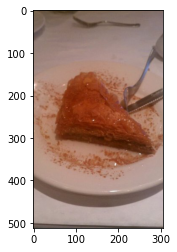

In [120]:
plt.imshow(plt.imread(guess_info['exact_path']))
guess_info['label']

In [51]:
food_search = food_data.search_foods(LABELS[GUESS_LABEL_INDEX].replace('_', ' '))

In [52]:
food_data.get_energy(food_search)

{'nutrientId': 1008,
 'nutrientName': 'Energy',
 'nutrientNumber': '208',
 'unitName': 'KCAL',
 'value': 278,
 'rank': 300,
 'indentLevel': 1,
 'foodNutrientId': 28739492}